# Decison Trees

First we'll load some fake data on past hires I made up. Note how we use pandas to convert a csv file into a DataFrame:

### Pretreatement

In [40]:
import numpy as np
import pandas as pd

In [41]:
input_file = "/home/imen/Forecasting-ANN/Data/Ellis.csv"
df_Ellis = pd.read_csv(input_file, header = 0,sep=";")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07ac818a90>,
      dtype=object)

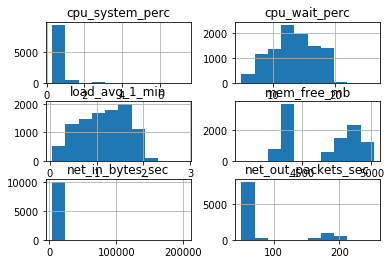

In [42]:
df_Ellis.hist()

In [43]:
df_Ellis.shape
print('Column names are: ',list(df_Ellis.columns))

Column names are:  ['Timestamp', 'load_avg_1_min', 'cpu_wait_perc', 'net_out_packets_sec', 'cpu_system_perc', 'net_in_bytes_sec', 'mem_free_mb']


In [44]:
df_Ellis.shape

(10000, 7)

In [45]:
df_Ellis['SLO1'] = 0
df_Ellis['SLO2'] = 0
df_Ellis['SLO3'] = 0

In [46]:
df_Ellis.head(10)

,Timestamp,load_avg_1_min,cpu_wait_perc,net_out_packets_sec,cpu_system_perc,net_in_bytes_sec,mem_free_mb,SLO1,SLO2,SLO3
0,2016-08-31T20:47:23.230Z,2.04,16.8,65.800000,3.6,5967.800000,4997.0,0,0,0
1,2016-08-31T20:47:53.252Z,1.82,12.7,65.266667,0.9,5722.100000,5014.0,0,0,0
2,2016-08-31T20:48:23.233Z,1.63,14.3,65.200000,0.6,5487.333333,5013.0,0,0,0
3,2016-08-31T20:48:53.256Z,1.63,17.5,65.233333,0.6,5545.433333,5014.0,0,0,0
4,2016-08-31T20:49:23.235Z,1.37,18.0,65.866667,0.5,5597.666667,5013.0,0,0,0
5,2016-08-31T20:49:53.248Z,1.62,17.9,64.400000,0.6,5576.833333,5013.0,0,0,0
6,2016-08-31T20:50:23.237Z,1.49,17.4,66.800000,0.5,5595.966667,5013.0,0,0,0
7,2016-08-31T20:50:53.255Z,1.17,17.8,62.866667,0.5,5437.466667,5013.0,0,0,0
8,2016-08-31T20:51:23.239Z,1.57,14.6,64.300000,0.5,5498.233333,5014.0,0,0,0
9,2016-08-31T20:51:53.263Z,1.24,11.4,64.133333,0.5,5553.533333,5014.0,0,0,0


In [47]:
df_Ellis.describe(percentiles=[.95])

,load_avg_1_min,cpu_wait_perc,net_out_packets_sec,cpu_system_perc,net_in_bytes_sec,mem_free_mb,SLO1,SLO2,SLO3
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0
mean,1.156925,13.285880,83.713010,0.698570,8050.983438,4648.403200,0.0,0.0,0.0
std,0.497229,3.438666,47.029871,0.326024,6556.417684,252.783234,0.0,0.0,0.0
min,0.050000,4.900000,50.833333,0.300000,4519.066667,4062.000000,0.0,0.0,0.0
50%,1.190000,13.200000,63.200000,0.600000,5466.866667,4721.000000,0.0,0.0,0.0
95%,1.880000,18.300000,192.133333,1.000000,21139.343333,5004.000000,0.0,0.0,0.0
max,2.880000,26.200000,252.200000,7.300000,201783.466667,5017.000000,0.0,0.0,0.0


In [49]:

df_Ellis.SLO1[df_Ellis.cpu_wait_perc > 18.3] = 1
df_Ellis.SLO2[df_Ellis.load_avg_1_min > 1.88] = 1
df_Ellis.SLO3[df_Ellis.net_in_bytes_sec > 21139.343333] = 1


#df_Ellis[df_Ellis.SLO2=1]
#df_Ellis[df_Ellis.SLO3=1]

/home/imen/data-science/TNSM-master/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/imen/data-science/TNSM-master/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/imen/data-science/TNSM-master/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

19      1
25      1
29      1
35      1
66      1
68      1
69      1
70      1
73      1
86      1
88      1
119     1
130     1
159     1
161     1
167     1
217     1
232     1
245     1
251     1
256     1
263     1
277     1
306     1
322     1
353     1
354     1
356     1
362     1
393     1
       ..
5494    1
5499    1
5500    1
5501    1
5506    1
5510    1
5514    1
5515    1
5517    1
5518    1
5528    1
5529    1
5530    1
5531    1
5532    1
5533    1
5535    1
5536    1
5537    1
5539    1
5540    1
5541    1
5542    1
5543    1
5545    1
5546    1
5547    1
5626    1
6603    1
8434    1
Name: SLO1, Length: 474, dtype: int64

In [53]:
import numpy as np
import pandas as pd
from sklearn import tree

#input_file = "Data/EllisTree.csv"
#df = pd.read_csv(input_file, header = 0,sep=";")

df = df_Ellis;

In [54]:
df.head()

,Timestamp,load_avg_1_min,cpu_wait_perc,net_out_packets_sec,cpu_system_perc,net_in_bytes_sec,mem_free_mb,SLO1,SLO2,SLO3
0,2016-08-31T20:47:23.230Z,2.04,16.8,65.800000,3.6,5967.800000,4997.0,0,1,0
1,2016-08-31T20:47:53.252Z,1.82,12.7,65.266667,0.9,5722.100000,5014.0,0,0,0
2,2016-08-31T20:48:23.233Z,1.63,14.3,65.200000,0.6,5487.333333,5013.0,0,0,0
3,2016-08-31T20:48:53.256Z,1.63,17.5,65.233333,0.6,5545.433333,5014.0,0,0,0
4,2016-08-31T20:49:23.235Z,1.37,18.0,65.866667,0.5,5597.666667,5013.0,0,0,0


scikit-learn needs everything to be numerical for decision trees to work. So, we'll map Y,N to 1,0 and levels of education to some scale of 0-2. In the real world, you'd need to think about how to deal with unexpected or missing data! By using map(), we know we'll get NaN for unexpected values.

In [55]:
'''d = {'Y': 1, 'N': 0, 'F' : 2}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()'''

"d = {'Y': 1, 'N': 0, 'F' : 2}\ndf['Hired'] = df['Hired'].map(d)\ndf['Employed?'] = df['Employed?'].map(d)\ndf['Top-tier school'] = df['Top-tier school'].map(d)\ndf['Interned'] = df['Interned'].map(d)\nd = {'BS': 0, 'MS': 1, 'PhD': 2}\ndf['Level of Education'] = df['Level of Education'].map(d)\ndf.head()"

Next we need to separate the features from the target column that we're trying to bulid a decision tree for.

In [56]:
features = list(df.columns[1:7])
features

['load_avg_1_min',
 'cpu_wait_perc',
 'net_out_packets_sec',
 'cpu_system_perc',
 'net_in_bytes_sec',
 'mem_free_mb']

Now actually construct the decision tree:

In [59]:
df.loc[:,"SLO1":"SLO3"].head()

,SLO1,SLO2,SLO3
0,0,1,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [60]:
y = df.loc[:,"SLO1":"SLO3"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

... and display it. Note you need to have pyplot2 installed for this to work.

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "no hires" and 5 "hires" by the tim we get to that point. value = [3. 0.] means 3 no-hires and 0 hires.

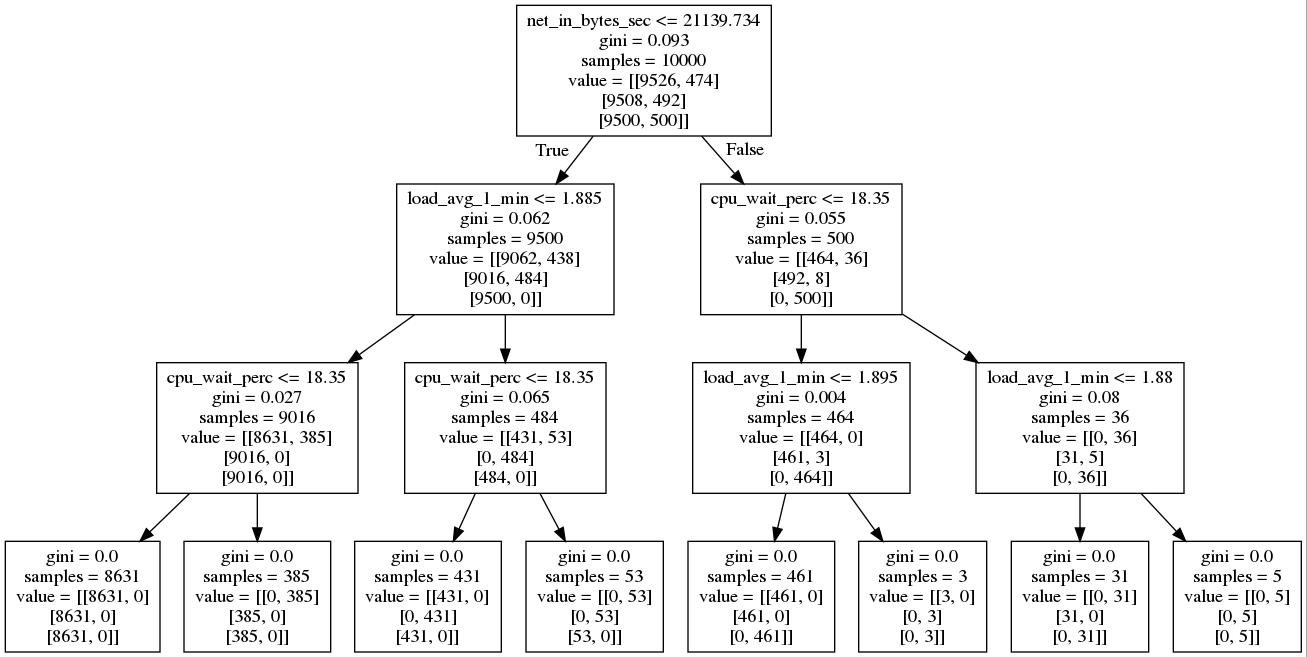

In [61]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus



dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_jpeg())

## Ensemble learning: using a random forest

We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#Predict employment of an employed 10-year veteran
clf.predict([[10, 1, 4, 0, 0, 0]])
#...and an unemployed 10-year veteran

clf.predict([[10, 0, 4, 0, 0, 0]])

array([[0., 1., 0.]])

## Activity

Modify the test data to create an alternate universe where everyone I hire everyone I normally wouldn't have, and vice versa. Compare the resulting decision tree to the one from the original data.